# 6. Optimisation
**Camilo A. Garcia Trillos - 2020**

---

# In this notebook

The goals for this notebook are
- Learning some optimisation routines available from Scipy


We start by including some of the packages you might need in the following. Feel free to add as many (standard) additional packages as you want.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D


The main new module is *minimize*. It is a numerical minimizer. Let us make ourselves familiar with it and show a quick example of how it works.

Start by reading the help function on *minimize*:

In [0]:
minimize?

This function is a sort of 'wrapper' that unifies the syntax to call many different minimisation routines depending on the given restrictions and assumptions.

Let us illustrate its use by means of a simple example: we try to maximise the function $f_1:\mathbb R^2 \rightarrow \mathbb R$ given by
$$f_1(\mathbf x) = \exp( -(x_1-1)^2 - (x_1-3)^2    )$$
It can be easily seen that the solution is $\mathbb x^*:=(1,3)$

In the following, we simply define the function and then call *minimize* with the default parameters. Note that we use a minimisation solver to solve a maximisation one, so we need to **minimise the negative of $$\tilde f_1:=-f_1$$**



In [2]:
def f1(x):
    return np.exp( - ((x-np.array([1,3]))**2).sum(axis=-1) )    # The axis=-1 parameter in sum is needed for the plot below. Think why when examining the code.

assert f1(np.array([1,3]))==1, "Failed test with (1,3)"
assert f1(np.array([0,0]))==np.exp(-10), "Failed test with (0,0)"


f1_tilde = lambda x: -f1(x)

It is useful for the sequence to plot the function $f_1$.

Text(0.5, 0.92, 'Function $f_1$ and its maximum')

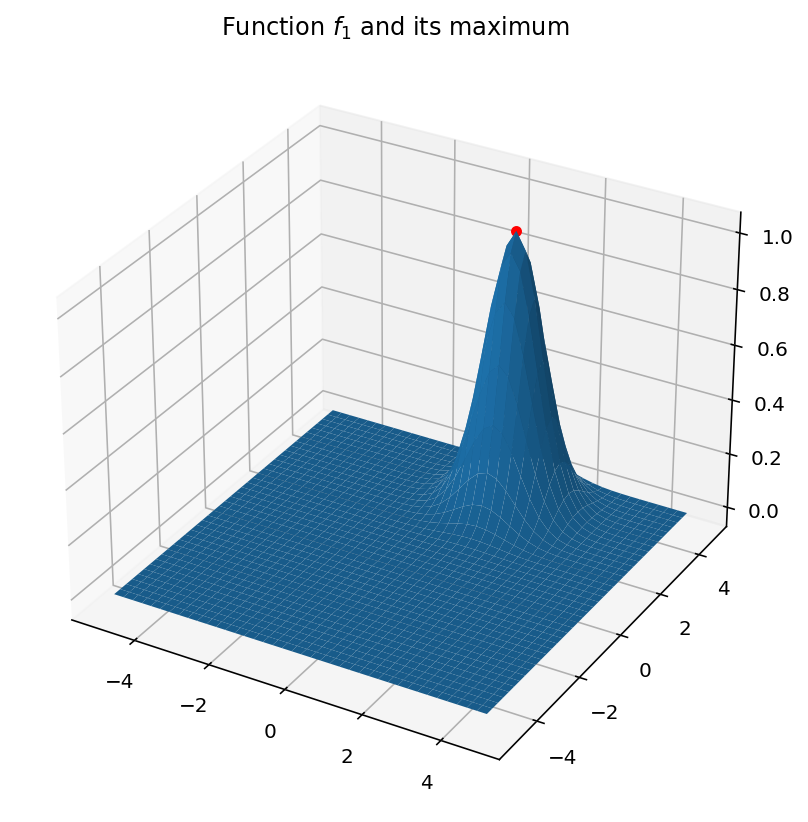

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')    # To make a 3d plot

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)       # repeat X and Y in a pattern so that they form unique pairs covering the given ranges
Z = f1(np.dstack((X,Y)))       # dstack joins the value of X and Y, and then f1 calculates the function for each value

surf = ax.plot_surface(X, Y, Z)
ax.scatter(1 , 3, 1, color='red')
ax.set_title('Function $f_1$ and its maximum')


Now, we can proceed to the maximisation. remember that we will minimise the function $-f_1$

In [4]:
sol = minimize(f1_tilde,np.zeros(2))
sol

      fun: -0.9999999999977625
 hess_inv: array([[ 1264.95690837,  3791.87065702],
       [ 3791.87065702, 11376.61176679]])
      jac: array([-9.90927219e-07, -2.80141830e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 2
     njev: 15
   status: 0
  success: True
        x: array([0.9999995 , 2.99999859])

Let us quickly glance at the returned solution: first note that the variable 'success' is 'True', so the procedure identifies a possible solution given by the entry 'x' (very close to the exact one). The value of the function at this point is returned in 'fun', as well as approximations for the inverse of the Hessian (second derivative) and the Jacobian (first derivative) at this point. It also returns the number of function evaluations required ('nfev'), and number of iterations ('nit'). This information is particularly relevant to understand cases where no solution is found.



What happens if we want to minimise f1? We know that there is no solution (the function tends to zero as $|x|$ goes to infinity, but no minimum exists).



In [5]:
sol2 = minimize(f1,np.zeros(2))
sol2


      fun: 1.334786886355198e-06
 hess_inv: array([[ 508.96170549, 1523.88516513],
       [1523.88516513, 4572.65564132]])
      jac: array([3.10483462e-06, 9.31450448e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([-0.16304509, -0.48913528])


However, the algorithm believes it has found a solution. Indeed, it offers something close to [-0.16,-0.48] as a solution, after 6 iterations. What happens? Well, this algorithm tries to identify the minimum by enforcing a first order condition $$\nabla f(x^*)=0.$$ Since it is only calculating an approximation of the functions, it stops when the gradient is very small (which is the case here, the approximated gradients are of the order of $10^{-6}$ as given by 'jac'). This example shows that some care must be taken when using numerical minimisation routines and it is important to interpret correctly the solution.

Let us see another example. Let us now maximise the function $$f_1$$ when constraining ourselves to be in the square (2,4)x(0,2). We then add the constraints using the 'bounds' argument. (Check again the help function on *minimize* if needed). We set this parameter to [(2,4),(0,2)].

We can easily verify that the maximal with the above constraints would lie in the corner of (2,2).







In [6]:
sol3 = minimize(f1_tilde,np.array([3,1]), bounds=[(2,4),(0,2)] )
sol3

      fun: -0.13533527781788743
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.27067056, -0.27067055])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 2
     njev: 8
   status: 0
  success: True
        x: array([2.00000002, 2.        ])

The solution is found after 2 iterations and is correct.  Let us now pay attention to the parameter X0 of the function minimize. It is the initial 'guess' to start the search for a minimal. Results may be sensitive on this parameter. For example, running the above again but with a different initial guess (this time (4,0)) we get

In [7]:
sol4 = minimize(f1_tilde,np.array([4,0]), bounds=[(2,4),(0,2)] )
sol4

      fun: -1.522997974471263e-08
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.13798783e-08, -9.13798777e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([4., 0.])

As seen here the function fails. Again the problem lies when approximating the first order condition, and illustrates the importance of the initial choice in succeeding in its use.

Note that more general constraints of the function can be added. For example, we can maximise subject to the constrain $x\cdot (1,1)-2=0$. Let us first modify our plot above to illustrate the answer.

(Note that the constraint can be parametrised by the points (a, 2-a  ))



Text(0.5, 0, 'f_1((x_1,x_2))')

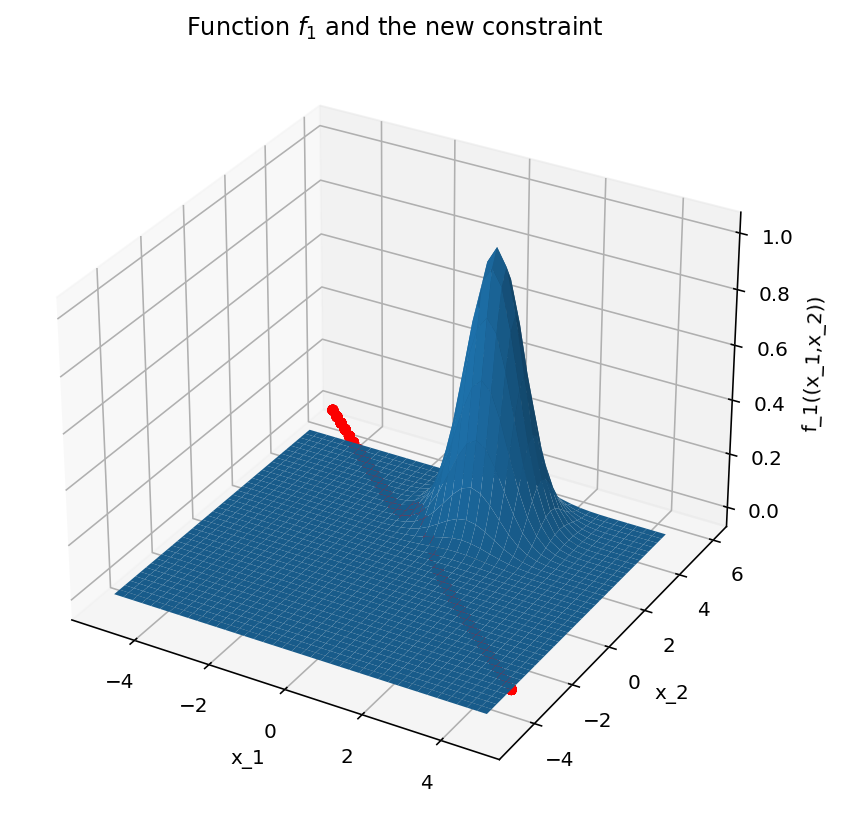

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')    # To make a 3d plot

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)       # repeat X and Y in a pattern so that they form unique pairs covering the given ranges
Z = f1(np.dstack((X,Y)))       # dstack joins the value of X and Y, and then f1 calculates the function for each value

surf = ax.plot_surface(X, Y, Z)
ax.scatter(X , 1-X, f1(np.dstack((X,2-X)))  , color='red')
ax.set_title('Function $f_1$ and the new constraint')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f_1((x_1,x_2))')



Graphically, it looks like the optimal is located at (0,2). Let us check this with the actual procedure.

In [10]:
sol5 = minimize(f1_tilde,np.array([1,1]), constraints={'type': 'eq', 'fun': lambda x: x@np.array([1,1])-2} )
sol5

     fun: -0.13533528323655877
     jac: array([-0.27067045, -0.27067069])
 message: 'Optimization terminated successfully'
    nfev: 17
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([4.46371348e-07, 1.99999955e+00])

## Exercises


1. It is possible to pre-calculate the gradient in some cases to increase the performance of the minimisation procedure. Calculate the gradient (jacobian) and the Hessian matrix of $f_1$. Implement them, and pass them (the Jacobian and the **inverse** of the Hessian) to the minimize procedure. Run similar tests as above and compare.

2. Construct other examples of functions for which you can find the optimal with and without constraints and check the answers that the maximize routine produces.